<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/catboost_sku_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


In [27]:
import pandas as pd
df = pd.read_excel('/content/mat_y_40_sku.xlsx')

In [28]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1)).dt.to_period('M')
df

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL,Date
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,0.287575,2022-01
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,0.015748,2022-02
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,0.002016,2022-03
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,1.000000,2024-01
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,1.000000,2024-02
...,...,...,...,...,...,...,...,...,...,...,...
2030,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,0.027145,2023-10
2031,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,0.006087,2022-11
2032,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,0.026897,2023-11
2033,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,0.017582,2022-12


0:	learn: 0.2549649	test: 0.3006105	best: 0.3006105 (0)	total: 5.53ms	remaining: 27.6s
100:	learn: 0.1727059	test: 0.2431747	best: 0.2431747 (100)	total: 470ms	remaining: 22.8s
200:	learn: 0.1333160	test: 0.2238677	best: 0.2238677 (200)	total: 929ms	remaining: 22.2s
300:	learn: 0.1129317	test: 0.2162489	best: 0.2162156 (299)	total: 1.4s	remaining: 21.9s
400:	learn: 0.1005072	test: 0.2111401	best: 0.2111401 (400)	total: 1.86s	remaining: 21.3s
500:	learn: 0.0922164	test: 0.2084755	best: 0.2084755 (500)	total: 2.79s	remaining: 25s
600:	learn: 0.0858189	test: 0.2068982	best: 0.2068679 (599)	total: 3.81s	remaining: 27.9s
700:	learn: 0.0796869	test: 0.2055348	best: 0.2054987 (693)	total: 4.82s	remaining: 29.6s
800:	learn: 0.0743549	test: 0.2041871	best: 0.2041361 (793)	total: 5.56s	remaining: 29.1s
900:	learn: 0.0698222	test: 0.2032381	best: 0.2032077 (899)	total: 6.02s	remaining: 27.4s
1000:	learn: 0.0659369	test: 0.2029925	best: 0.2028525 (955)	total: 6.51s	remaining: 26s
1100:	learn: 0.06

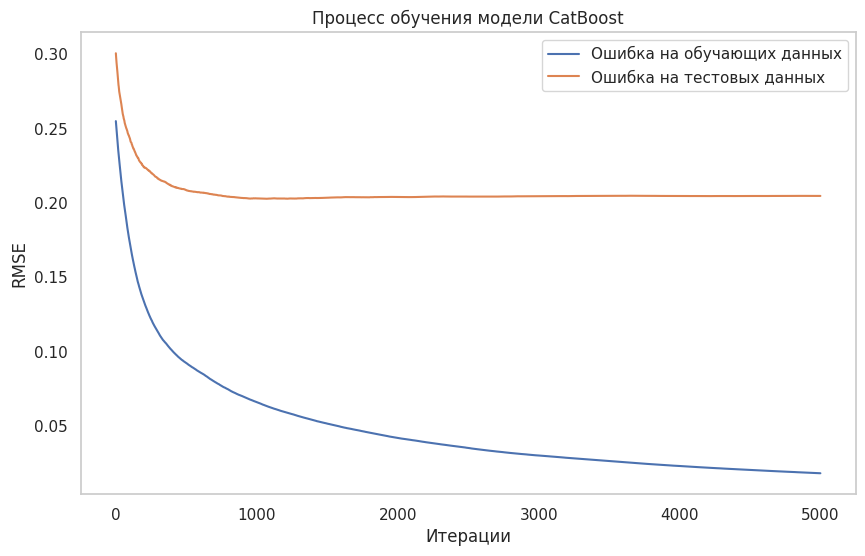

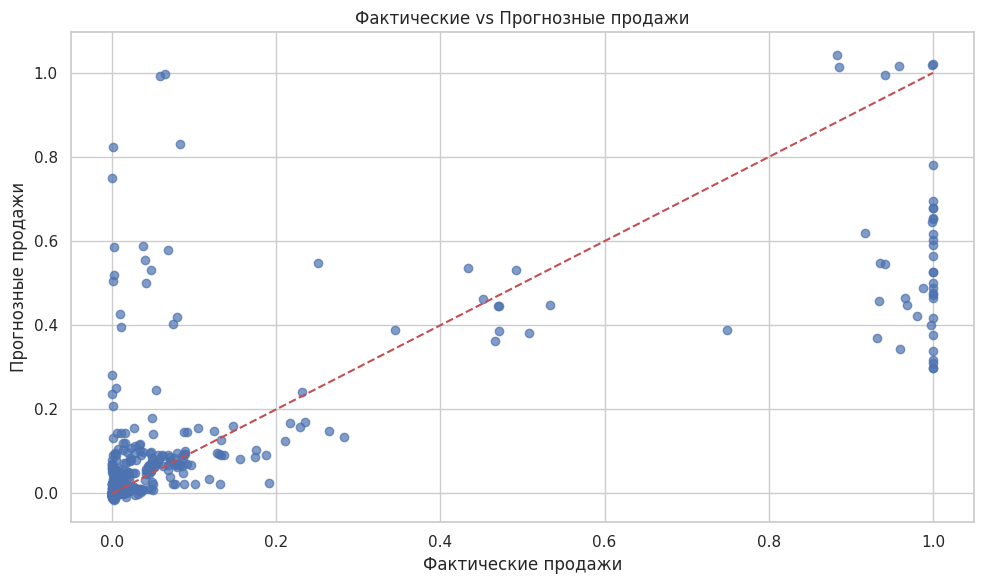

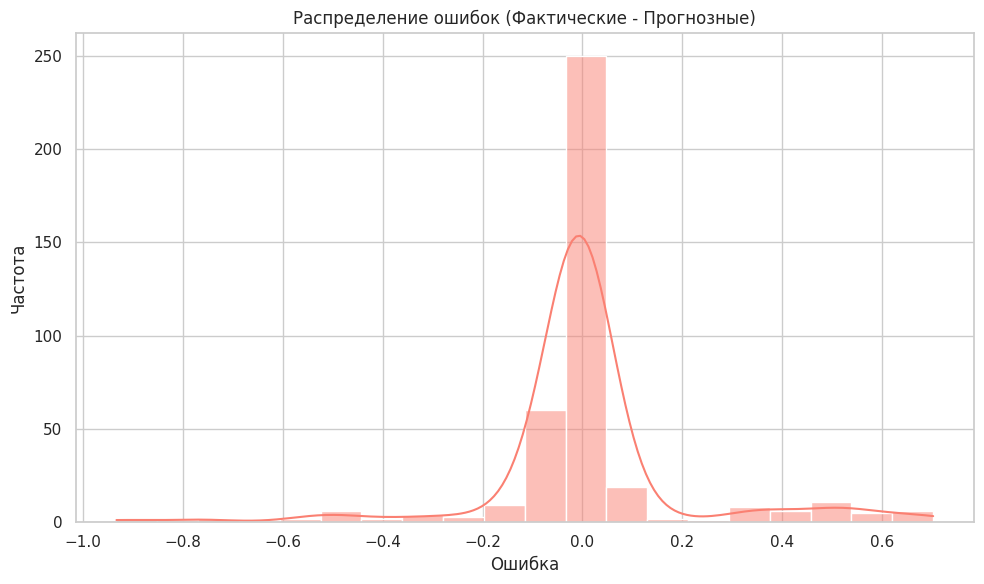

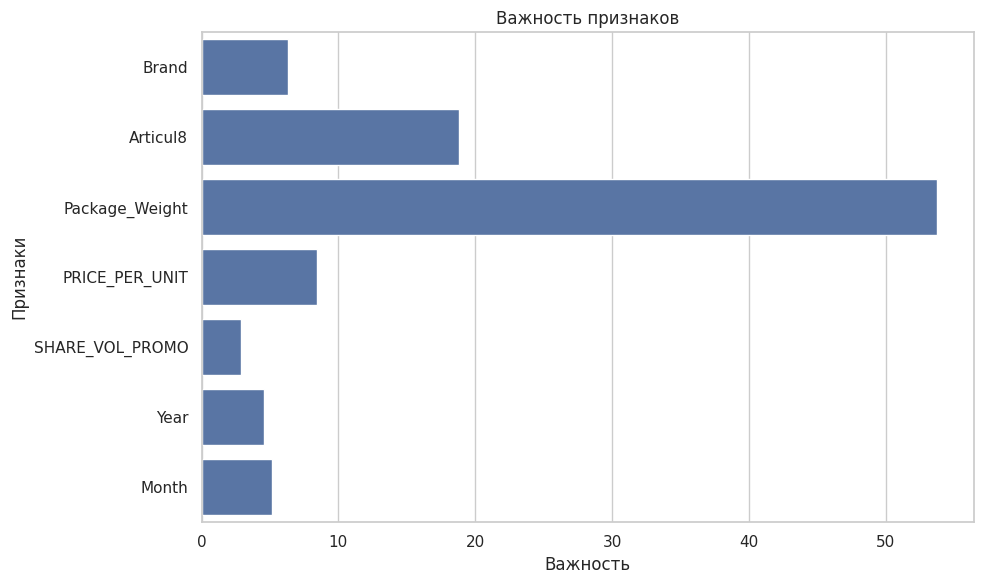

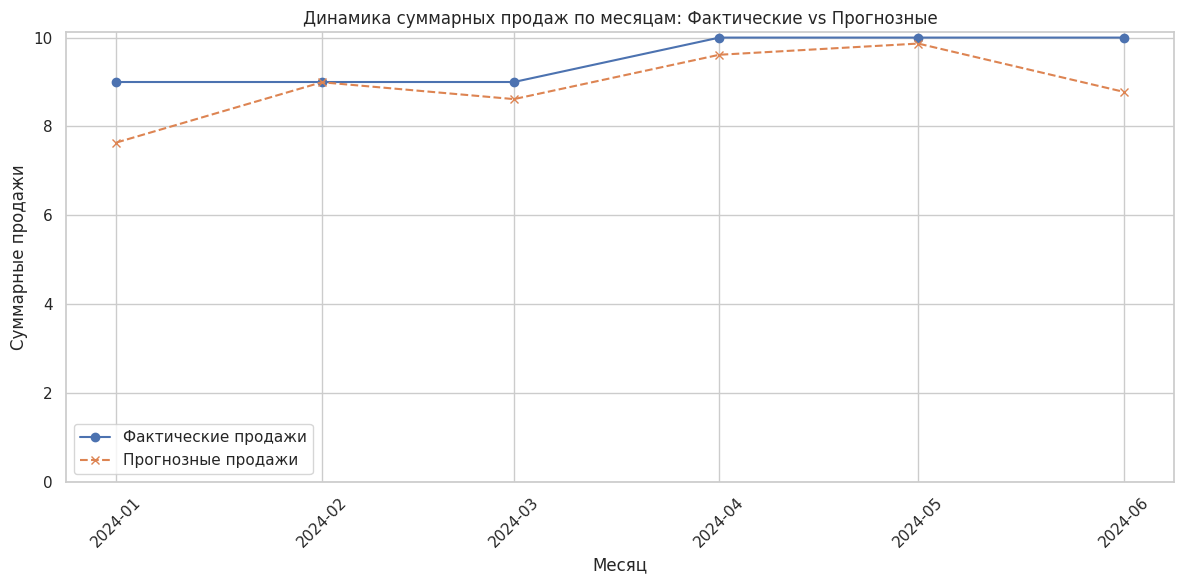


Суммарные фактические и прогнозные продажи по Brand:
          Brand  Sales_Actual  Sales_Predicted
0   Casa Margot      6.000000         1.940083
1  Cheese House      2.674447         2.661664
2     Excelsior      0.010026         0.132388
3     LAPLANDIA      0.135158         0.099693
4    La Paulina      0.077174         0.041593


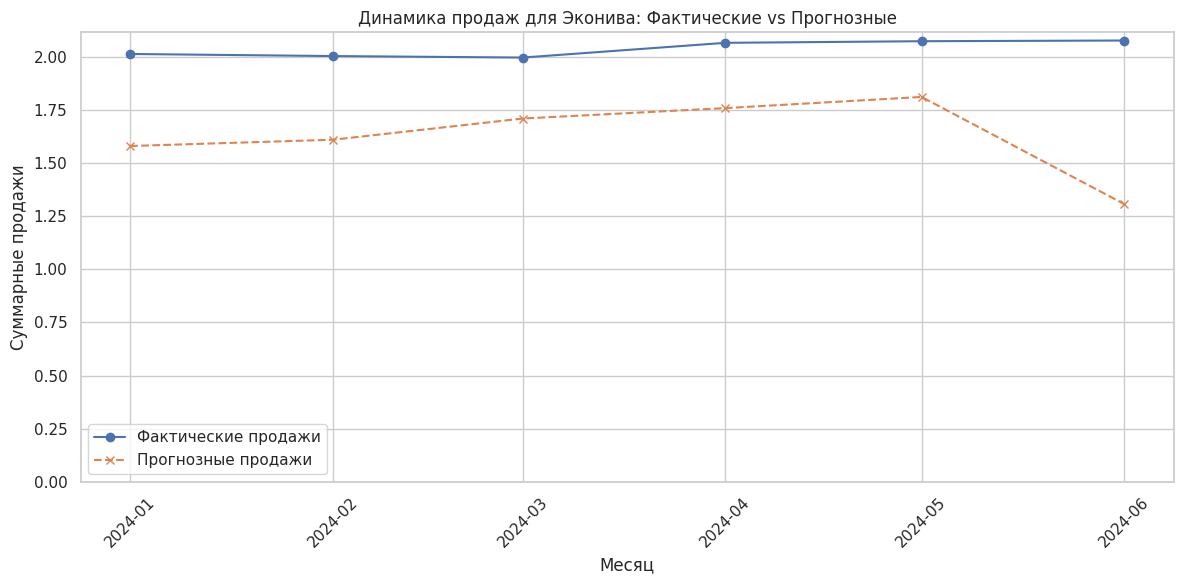

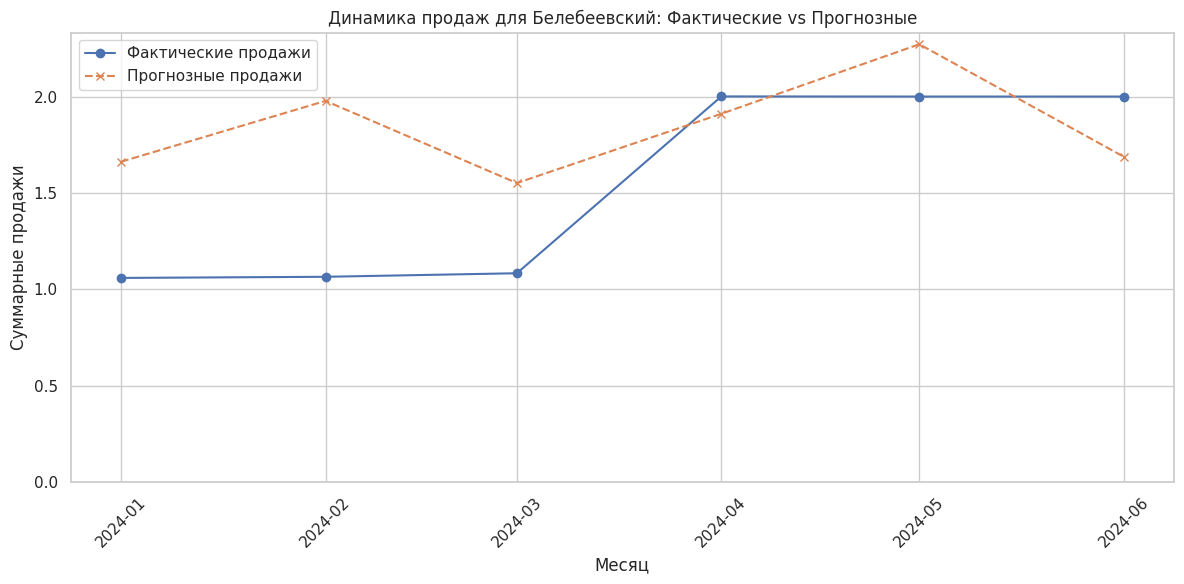

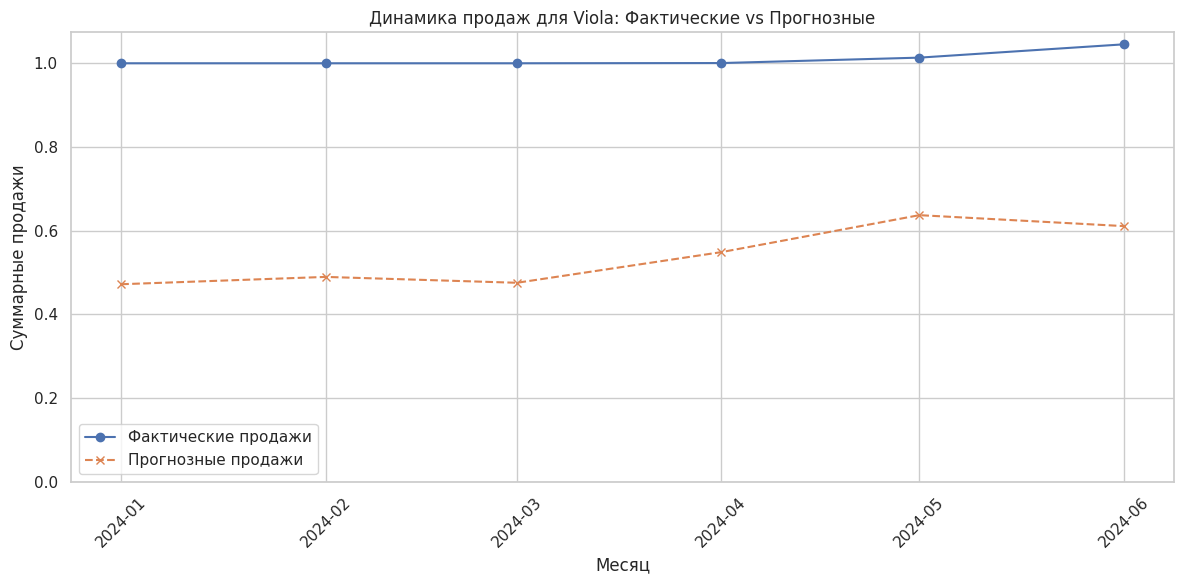

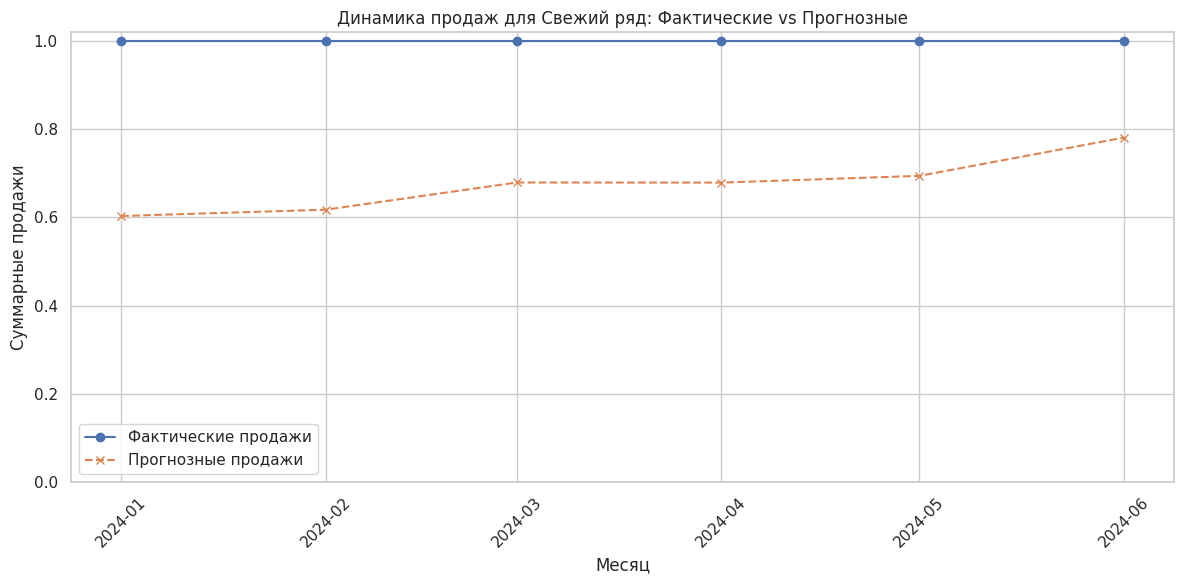

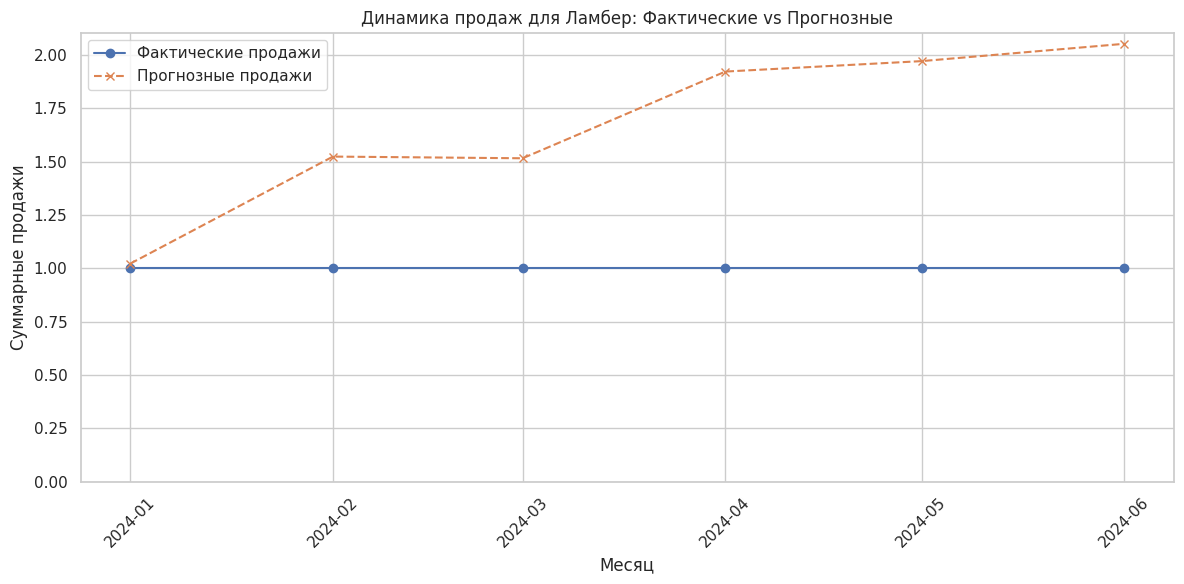


Суммарные фактические и прогнозные продажи по типам продукта (Articul8):
             Articul8  Sales_Actual  Sales_Predicted
0             Gourmet      0.164499         1.218209
1             Protein      0.000010         0.050070
2     Альпийское утро      0.398880         0.205689
3             Арамель      0.007388        -0.021919
4  Башкирский медовый      0.099632         0.691025


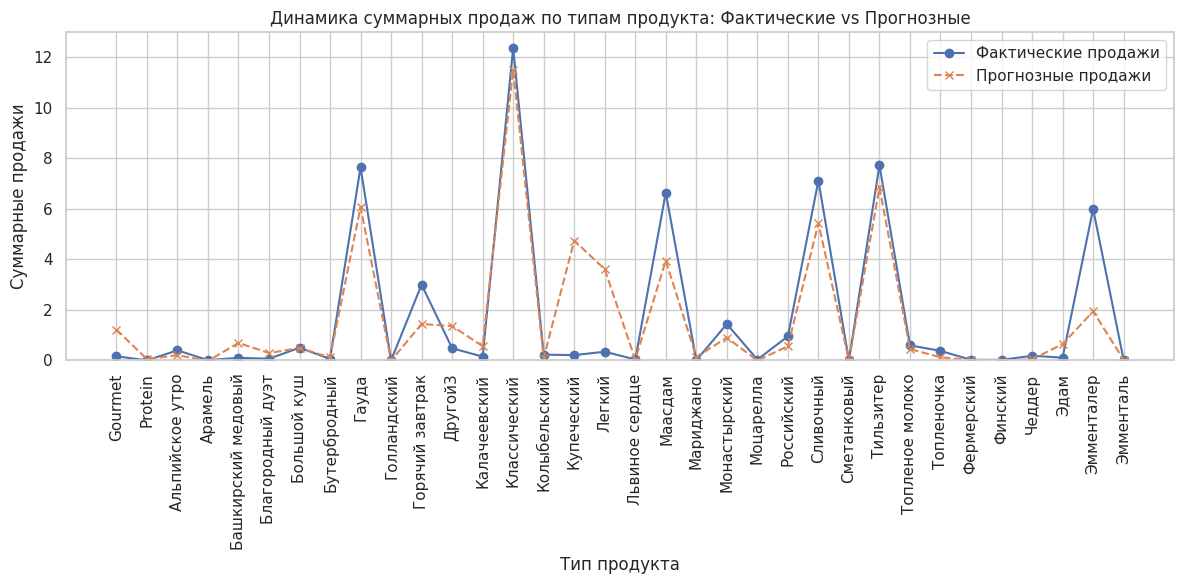

<ipython-input-30-c6da25185c3b>:299: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


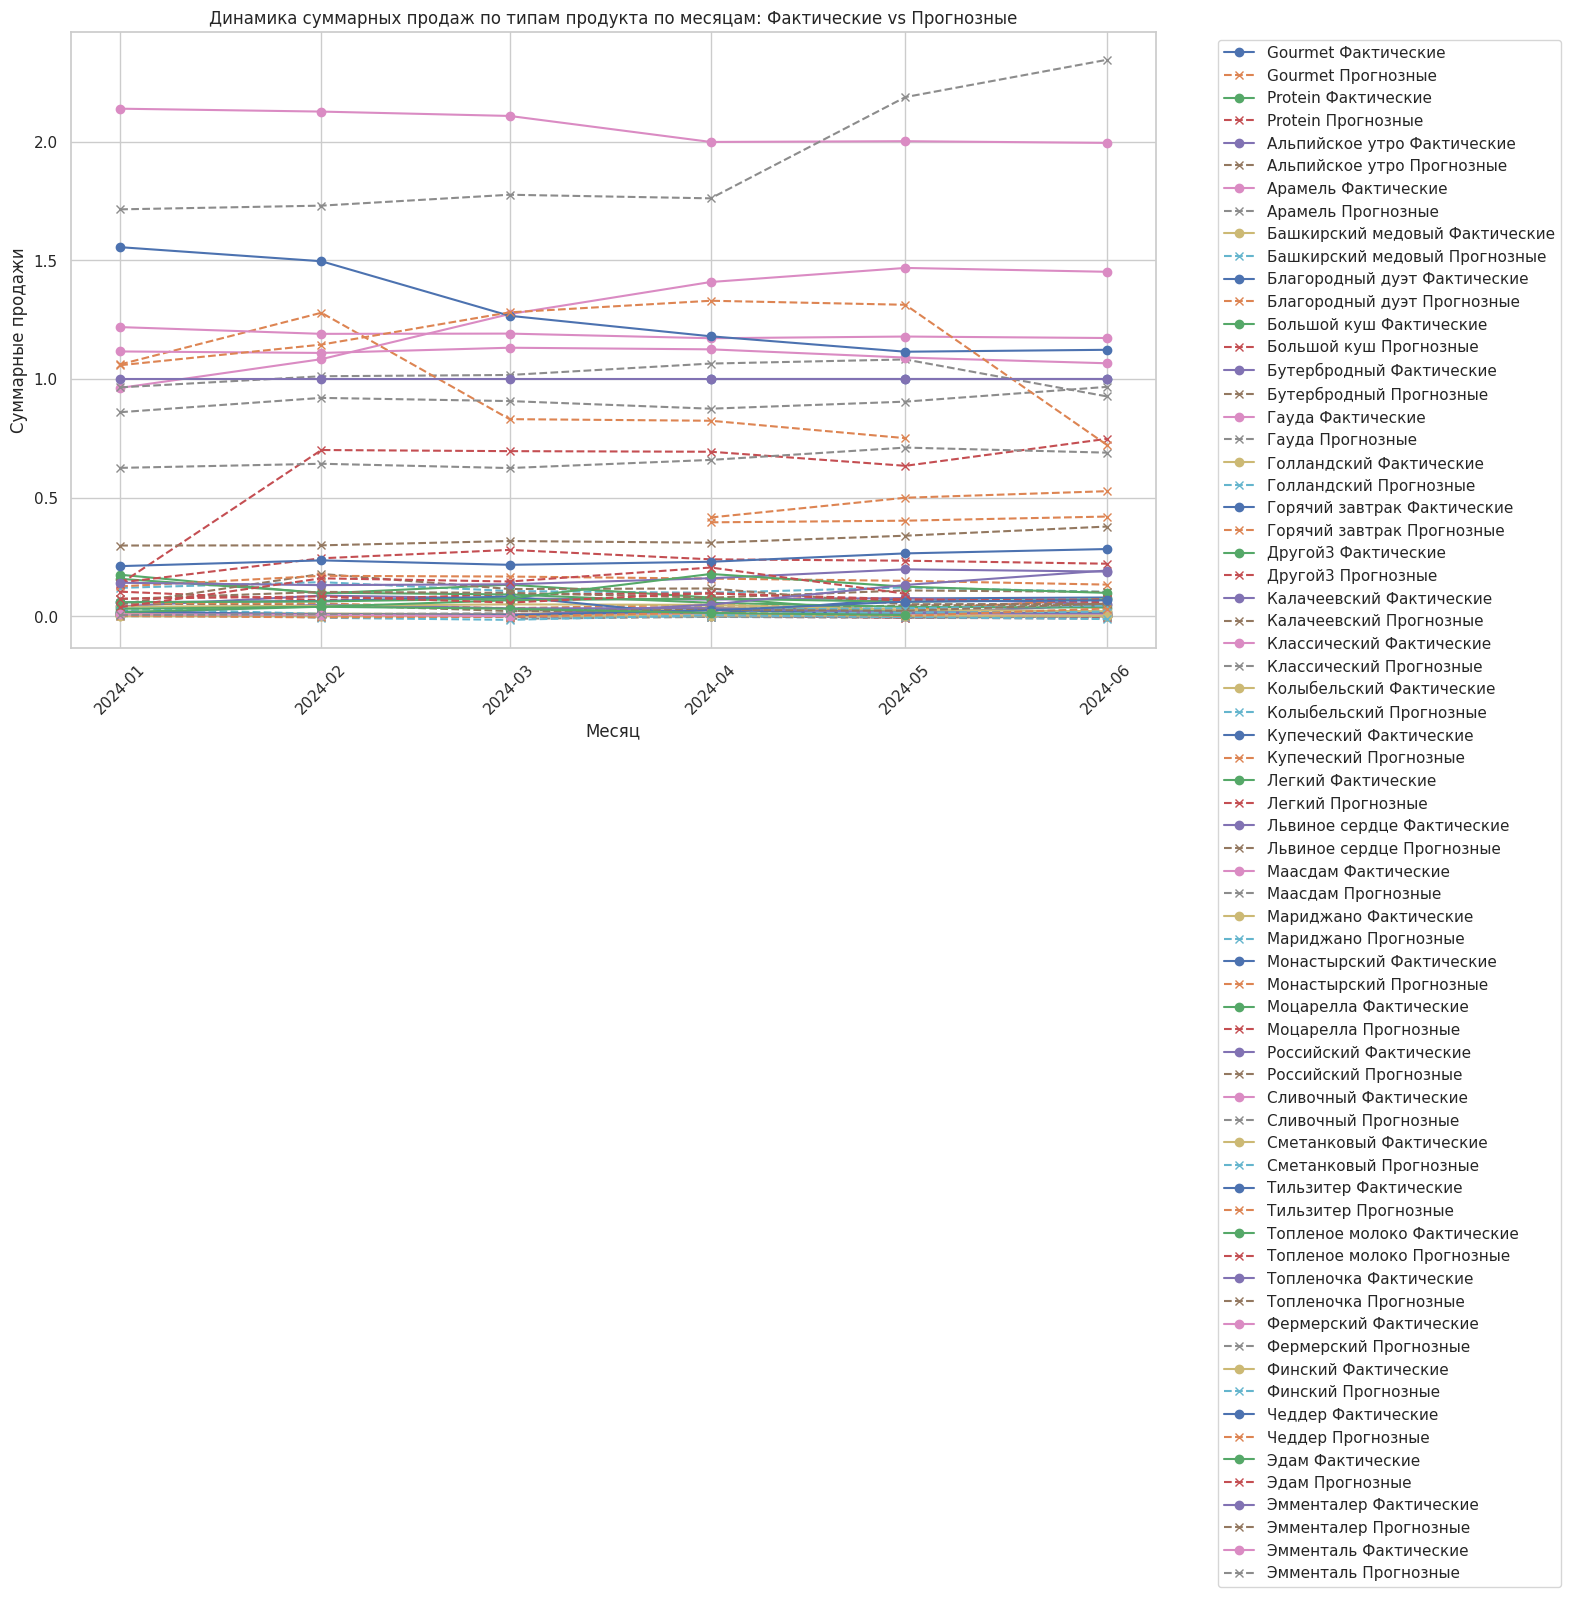

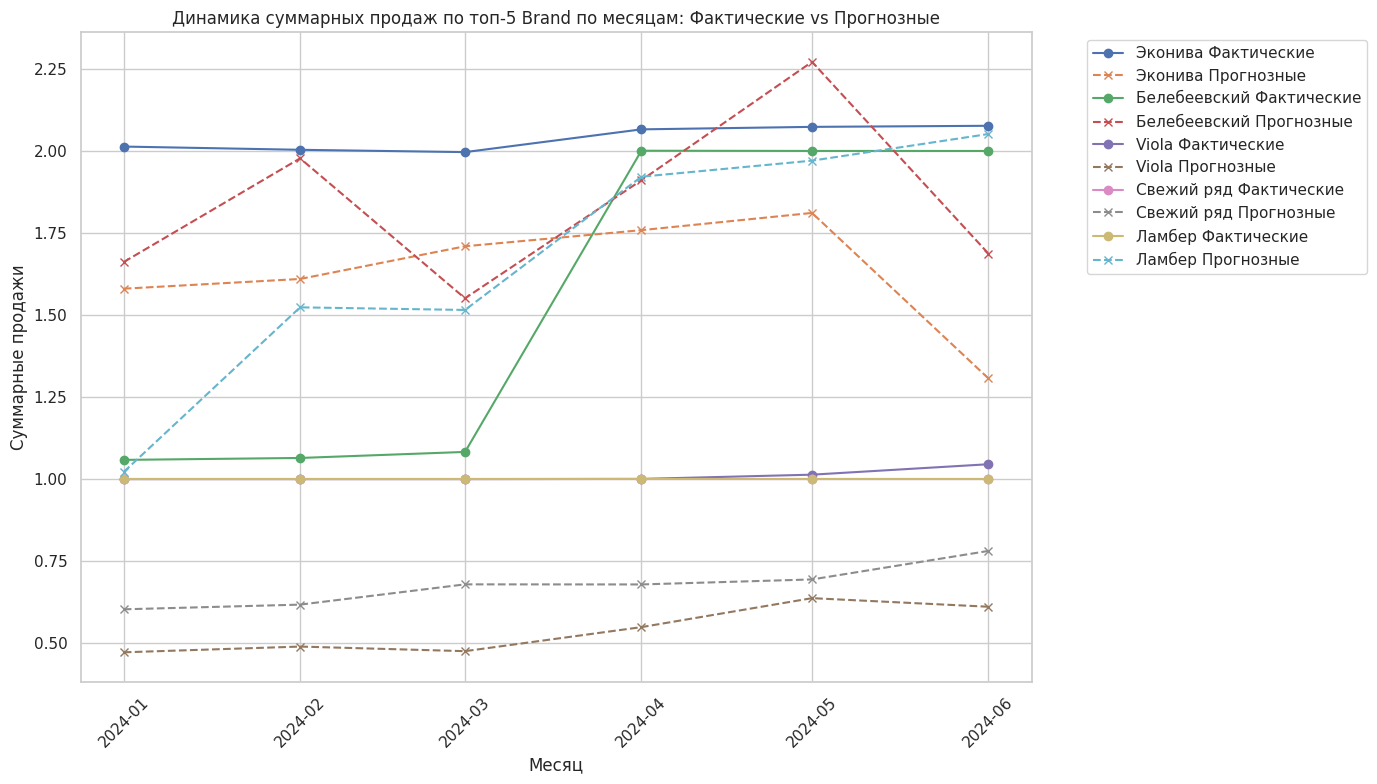


Построение линейных графиков завершено успешно.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Установка стиля для графиков
sns.set(style="whitegrid")

# Параметры генерации данных
# START_DATE = datetime(2022, 1, 1)  # Начало периода
data=df.copy()

# 1. Обработка новых колонок для модели
# data['Promotion'] = data['SHARE_VOL_PROMO'].apply(lambda x: 1 if x > 0 else 0)  # Признак проведения промо
data['Package_Weight'] = data['Analytic1'].apply(lambda x: int(x.split()[0]))  # Преобразование веса в числовой формат
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# 2. Преобразование категориальных признаков (Brand и Articul8)
categorical_features = ['Brand', 'Articul8']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 3. Подготовка данных для модели
features = ['Brand', 'Articul8', 'Package_Weight', 'PRICE_PER_UNIT', 'SHARE_VOL_PROMO', 'Year', 'Month']
target = 'SHARE_VOL'

X = data[features]
y = data[target]

# 4. Разделение данных на обучающую и тестовую выборки
# Используем данные до 2024 года в качестве обучающей выборки, 2024 год — тестовая выборка
train_df = data[data['Year'] < 2024]
test_df = data[data['Year'] >= 2024]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# 5. Обучение модели CatBoostRegressor
# Определяем категориальные признаки для CatBoost
cat_features_indices = [features.index(col) for col in categorical_features]
mtn ="RMSE"

# param_grid = {
#     'loss_function': [f'Huber:delta={delta}' for delta in [2.0,3.0,4.0]],
#     'iterations': [5000],
#     'depth': [4,6],  # Можно добавить другие значения глубины, если необходимо
#     'learning_rate': [0.01, 0.1],
#     'random_seed': [42]
# }
# Инициализация модели
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.01,
    depth=8,
    eval_metric="RMSE",
    # early_stopping_rounds=50,
    random_seed=42,
    loss_function="RMSE",#'MAE', 'Quantile','Huber:delta=2.0' 'Quantile:alpha=0.9'
    verbose=100,
    # early_stopping_rounds=500

)
# grid_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,  # Используем ту же сетку значений
#     n_iter=20,  # Количество случайных комбинаций
#     cv=3,
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=3
# )

# # Инициализация GridSearchCV
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     cv=3,  # Используем 3-fold кросс-валидацию
#     scoring='neg_mean_absolute_error',  # Метрика для оценки качества
#     n_jobs=-1,  # Используем все доступные ядра
#     verbose=3  # Отображение процесса подбора
# )

# Выполнение подбора параметров
# grid_search.fit(X_train, y_train)

# Вывод лучших параметров
# print(f"Лучший параметр delta: {grid_search.best_params_}")
# print(f"Наименьшая ошибка: {-grid_search.best_score_:.4f}")
# __________________
# Обучение модели
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features_indices,
    use_best_model=True
)


# 6. Прогнозирование и оценка модели
y_pred = model.predict(X_test)
# y_pred= y_pred[:, 0]

# Оценка метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nОценка модели на тестовой выборке:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


# Получаем значения ошибок на каждой итерации
train_errors = model.get_evals_result()['learn'][mtn]
test_errors = model.get_evals_result()['validation'][mtn]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Ошибка на обучающих данных')
plt.plot(test_errors, label='Ошибка на тестовых данных')
plt.xlabel('Итерации')
plt.ylabel('RMSE')
plt.title('Процесс обучения модели CatBoost')
plt.legend()
plt.grid()
plt.show()

# 7. Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Фактические vs Прогнозные продажи')
plt.xlabel('Фактические продажи')
plt.ylabel('Прогнозные продажи')
plt.tight_layout()
plt.show()

# Распределение ошибок
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True, color='salmon',hue=None)
plt.title('Распределение ошибок (Фактические - Прогнозные)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Важность признаков
feature_importances = model.get_feature_importance()
features_names = features

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features_names)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()
#________________________________________
# 8. Кросс-валидация
# kf = KFold(n_splits=5, shuffle=True, random_state=42,)
# cv_mae = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
# cv_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
# cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# print("\nКросс-валидация (5 фолдов):")
# print(f"Средний MAE: {-cv_mae.mean():.2f} ± {cv_mae.std():.2f}")
# print(f"Средний RMSE: {-cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
# print(f"Средний R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

# 9. Интеграция прогнозов в тестовую выборку
test_df = test_df.copy()

# Добавляем прогнозные значения в новую колонку
test_df['Predicted_Sales'] = y_pred

# Преобразование 'Date' в формат datetime перед группировкой
test_df['Date'] = pd.to_datetime(test_df['Date'].dt.to_timestamp())


# 10. Построение линейных графиков динамики продаж
def plot_comparative_line(data, x, y_actual, y_predicted, title, xlabel, ylabel, rotation=45):
    plt.figure(figsize=(12, 6))
    plt.plot(data[x], data[y_actual], marker='o', label='Фактические продажи')
    plt.plot(data[x], data[y_predicted], marker='x', linestyle='--', label='Прогнозные продажи')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.ylim(0, None)
    plt.tight_layout()
    plt.show()

# Сравнение фактических и прогнозных продаж по месяцам
monthly_sales = test_df.groupby('Date').agg({'SHARE_VOL': 'sum', 'Predicted_Sales': 'sum'}).reset_index()
plot_comparative_line(
    monthly_sales,
    x='Date',
    y_actual='SHARE_VOL',
    y_predicted='Predicted_Sales',
    title='Динамика суммарных продаж по месяцам: Фактические vs Прогнозные',
    xlabel='Месяц',
    ylabel='Суммарные продажи'
)

# 11. Сравнение суммарных продаж по Brand (фактические и прогнозные)
# Декодирование категориальных признаков обратно в исходные значения
def decode_labels(df, column, label_encoder):
    inverse_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
    return df[column].map(inverse_mapping)

test_df['Brand'] = decode_labels(test_df, 'Brand', label_encoders['Brand'])
test_df['Articul8'] = decode_labels(test_df, 'Articul8', label_encoders['Articul8'])

# Суммарные продажи по брендам
sales_per_brand_actual = test_df.groupby('Brand')['SHARE_VOL'].sum().reset_index()
sales_per_brand_predicted = test_df.groupby('Brand')['Predicted_Sales'].sum().reset_index()
sales_per_brand = pd.merge(sales_per_brand_actual, sales_per_brand_predicted, on='Brand', how='left')
sales_per_brand.rename(columns={'SHARE_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)

print("\nСуммарные фактические и прогнозные продажи по Brand:")
print(sales_per_brand.head())

# 12. Линейный график динамики продаж по брендам
top_n_brand = 5
top_brands = sales_per_brand.sort_values('Sales_Actual', ascending=False).head(top_n_brand)['Brand'].tolist()

for brand in top_brands:
    brand_data = test_df[test_df['Brand'] == brand]
    monthly_brand_actual = brand_data.groupby('Date')['SHARE_VOL'].sum().reset_index()
    monthly_brand_predicted = brand_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_brand = pd.merge(monthly_brand_actual, monthly_brand_predicted, on='Date', how='left')
    monthly_brand.rename(columns={'SHARE_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plot_comparative_line(
        monthly_brand,
        x='Date',
        y_actual='Sales_Actual',
        y_predicted='Sales_Predicted',
        title=f'Динамика продаж для {brand}: Фактические vs Прогнозные',
        xlabel='Месяц',
        ylabel='Суммарные продажи',
        rotation=45
    )

# 13. Сравнение суммарных продаж по типам продукта (фактические и прогнозные)
sales_per_articul8_actual = test_df.groupby('Articul8')['SHARE_VOL'].sum().reset_index()
sales_per_articul8_predicted = test_df.groupby('Articul8')['Predicted_Sales'].sum().reset_index()
sales_per_articul8 = pd.merge(sales_per_articul8_actual, sales_per_articul8_predicted, on='Articul8', how='left')
sales_per_articul8.rename(columns={'SHARE_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)

print("\nСуммарные фактические и прогнозные продажи по типам продукта (Articul8):")
print(sales_per_articul8.head())

# 14. Линейный график динамики продаж по типам продукта
plot_comparative_line(
    sales_per_articul8,
    x='Articul8',
    y_actual='Sales_Actual',
    y_predicted='Sales_Predicted',
    title='Динамика суммарных продаж по типам продукта: Фактические vs Прогнозные',
    xlabel='Тип продукта',
    ylabel='Суммарные продажи',
    rotation=90
)

# 15. Линейный график динамики продаж по месяцам для каждого типа продукта
plt.figure(figsize=(14, 8))
articul8_types_unique = sales_per_articul8['Articul8'].unique()
for articul8 in articul8_types_unique:
    articul8_data = test_df[test_df['Articul8'] == articul8]
    monthly_articul8_actual = articul8_data.groupby('Date')['SHARE_VOL'].sum().reset_index()
    monthly_articul8_predicted = articul8_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_articul8 = pd.merge(monthly_articul8_actual, monthly_articul8_predicted, on='Date', how='left')
    monthly_articul8.rename(columns={'SHARE_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plt.plot(monthly_articul8['Date'], monthly_articul8['Sales_Actual'], marker='o', label=f'{articul8} Фактические')
    plt.plot(monthly_articul8['Date'], monthly_articul8['Sales_Predicted'], marker='x', linestyle='--', label=f'{articul8} Прогнозные')

plt.title('Динамика суммарных продаж по типам продукта по месяцам: Фактические vs Прогнозные')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 16. Линейный график динамики продаж по брендам для каждого Brand
plt.figure(figsize=(14, 8))
for brand in top_brands:
    brand_data = test_df[test_df['Brand'] == brand]
    monthly_brand_actual = brand_data.groupby('Date')['SHARE_VOL'].sum().reset_index()
    monthly_brand_predicted = brand_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_brand = pd.merge(monthly_brand_actual, monthly_brand_predicted, on='Date', how='left')
    monthly_brand.rename(columns={'SHARE_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plt.plot(monthly_brand['Date'], monthly_brand['Sales_Actual'], marker='o', label=f'{brand} Фактические')
    plt.plot(monthly_brand['Date'], monthly_brand['Sales_Predicted'], marker='x', linestyle='--', label=f'{brand} Прогнозные')

plt.title(f'Динамика суммарных продаж по топ-{top_n_brand} Brand по месяцам: Фактические vs Прогнозные')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nПостроение линейных графиков завершено успешно.")


In [ ]:
'''Лучший параметр delta: {'random_seed': 42, 'loss_function': 'Huber:delta=3.0', 'learning_rate': 0.01, 'iterations': 5000, 'depth': 4}
Наименьшая ошибка: 7548.0586

Лучший параметр delta: {'random_seed': 42, 'loss_function': 'Huber:delta=2.0', 'learning_rate': 0.01, 'iterations': 5000, 'depth': 6}
Наименьшая ошибка: 7277.2099'''

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
!nvidia-smi


In [ ]:
import catboost
print(catboost.__version__)  # Должна быть версия, например, 1.0.3 и выше
